In [2]:
import pandas as pd
import numpy as np

from analysis.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analysis.missing_values_analysis import SimpleMissingValuesAnalysis
from analysis.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analysis.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsCategoricalAnalysis, CategoricalVsNumericalAnalysis
from analysis.multivariate_analysis import SimpleMultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
# Load the data

data_path = './data/extracted_data/train.csv'
df = pd.read_csv(data_path).drop('id',axis=1)

| Variable | Definition |
|:--------:|:--------:|
|  id   |  Unique ID for the customer   |
|  Gender   |  Gender of the customer   |
|  Age   |  Age of the customer   |
|  Driving_License   |  0 : Customer does not have DL, 1 : Customer already has DL   |
|  Region_Code   |  Unique code for the region of the customer   |
|  Previously_Insured   |  1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance   |
|  Vehicle_Age   |  Age of the Vehicle   |
|  Vehicle_Damage   |  1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.   |
|  Annual_Premium   |  The amount customer needs to pay as premium in the year   |
|  Policy_Sales_Channel   | Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.   |
|  Vintage   |  Number of Days, Customer has been associated with the company   |
|  Response   |  1 : Customer is interested, 0 : Customer is not interested   |

<br>

<br>

# Basic Inspection

In [9]:
# Basic Data Inspection

# Data Types Inspection
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


None

In [10]:
# Summar
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):


,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000
nunique,66.000000,2.000000,53.000000,2.000000,48838.000000,155.000000,290.000000,2.000000



Summary Statistics (Categorical Features):


,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


<br>

#### Data Types and Non-null Counts:
- The dataset contains **381,109 entries** and **10 columns** 
- The features `Driving_License`, `Region_Code`, `Policy_Sales_Channel` and `Previously_Insured` seem to be misclassified as `numerical`; their correct data type is `object`
- **Data Types:** There is 1 column with `float64` data type, 3 columns with `int64` data type and 7 columns with `object` data type.
    - **Numerical Features:**  `Age`, `Annual_Premium` and `Vintage`
    - **Categorical Features:** `Gender`, `Vehicle_Age`, `Vehicle_Damage`, `Policy_Sales_Channel`, `Driving_License`, `Region_Code` and `Previously_Insured`

 #### Summary Statistics:
 - **Target:**
    - The target variable `Response` is imbalanced, with only ~12% positive class.

- **Numerical Features:**
    - `Annual_Premium` has mean of **30,564.38** , a standard deviation of **17,213.15** and maximum value of **540,165.00** indicating presence of outliers.
 
- **Categorical Features:**
    - `Driving_License` has **99.8% of its values equal to 1** ( Customer already has DL), as expected.
    - `Region_Code` has **53 unqiue values**.
    - `Policy_Sales_Channel` has **155 unique values**

#### Missing Values
- There are no missing values in the dataset.

<br>
<hr>
<br>

### **Recommendations for Data Preprocessing**
- **Numerical Features:** Apply **StandardScaler** to `Age`, `Annual_Premium` and `Vintage`
- **Categorical Features:** Use an appropriate **encoding strategy**. Features like `Region_Code` and `Policy_Sales_Channel` have many unique values, so one-hot encoding may not be suitable. Consider using **target encoding** or other transformations;
- **Low-variance features:** `Driving_License`  has **99.8% of its values equal to 1**, so it can likely be **dropped** without impacting the target variable `Response`.

<br>

# Univariate Analysis

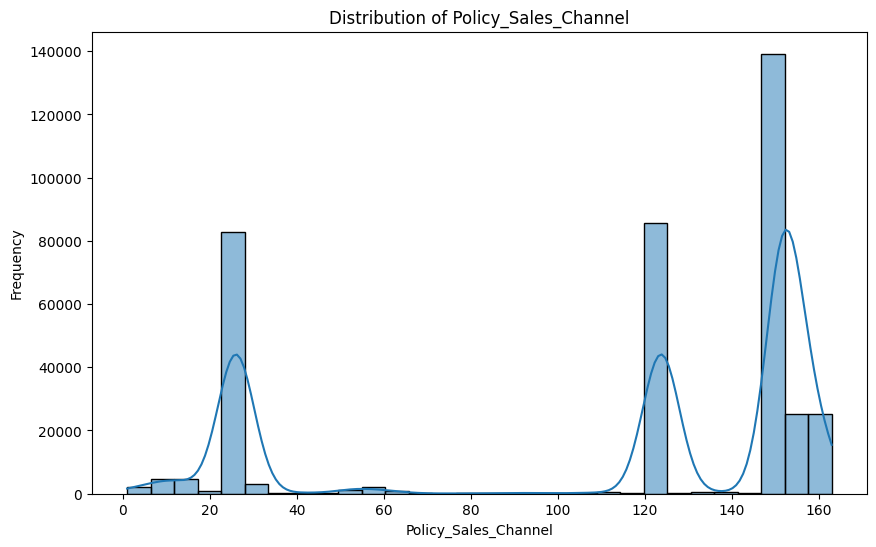

In [37]:
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'Policy_Sales_Channel')

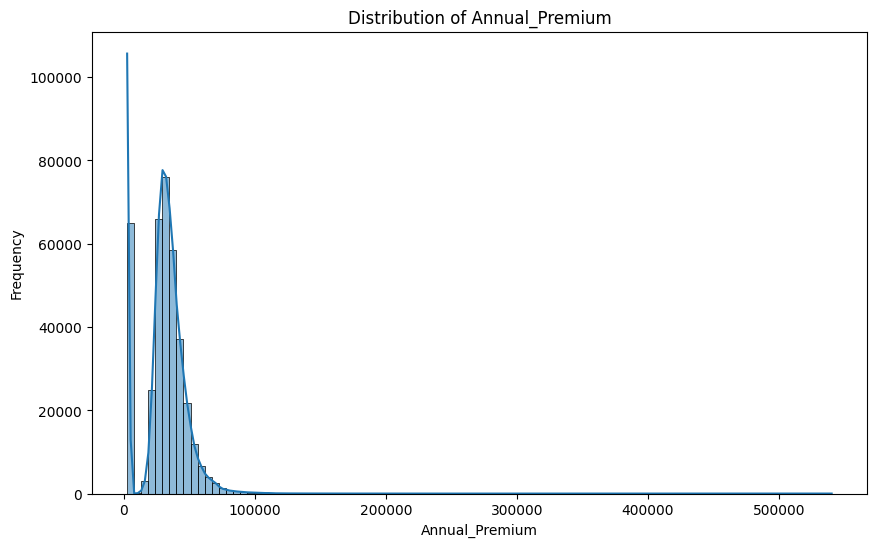

In [38]:
univariate_analyzer.execute_analysis(df, 'Annual_Premium', bins=100)

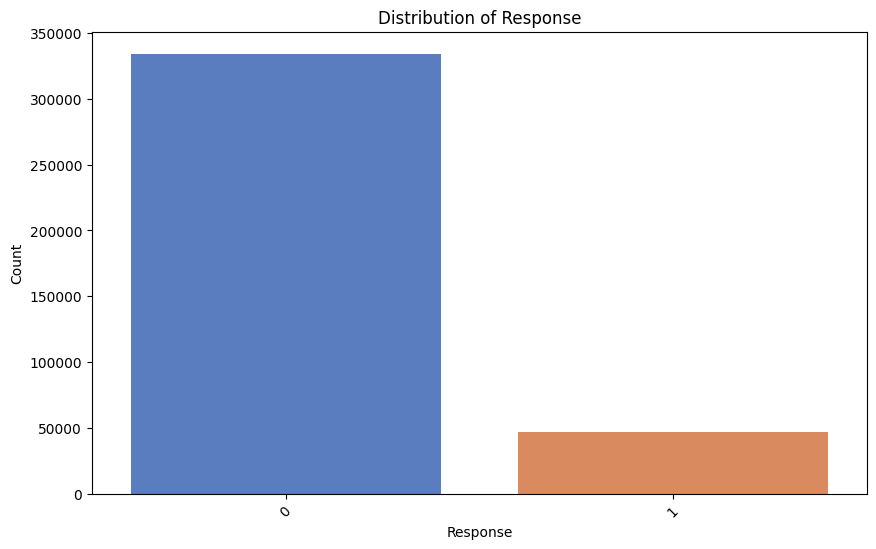

In [40]:
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'Response')

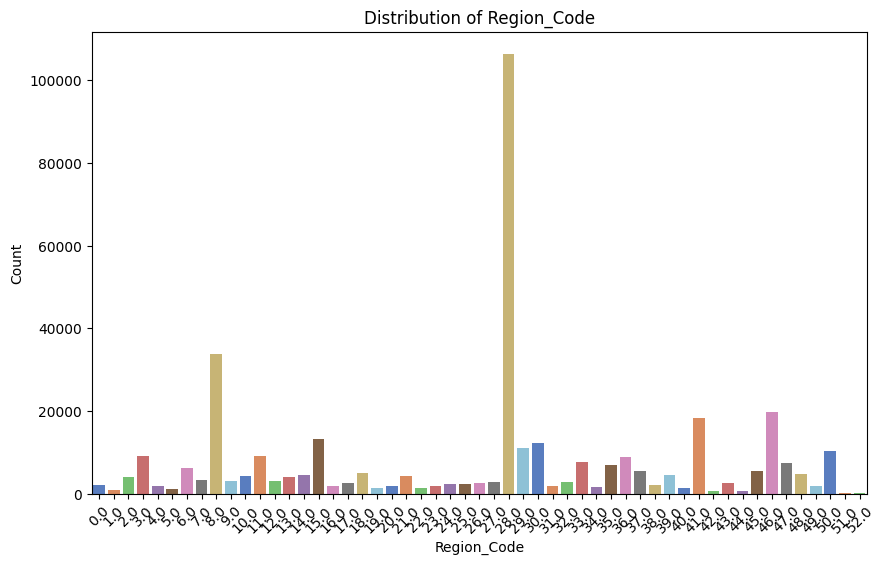

In [42]:
univariate_analyzer.execute_analysis(df, 'Region_Code')

<br>

In [15]:
# Bivariate Analysis

In [16]:
top_regions = df['Region_Code'].value_counts().index[:10]

df['Policy_Sales_Channel_cat'] = df['Policy_Sales_Channel'].apply(lambda x: 0 if x <60 else (1 if x<130 else 2)).astype('str')
df['Region_Code_cat'] = df['Region_Code'].apply(lambda x: x if x in top_regions else 'Other')

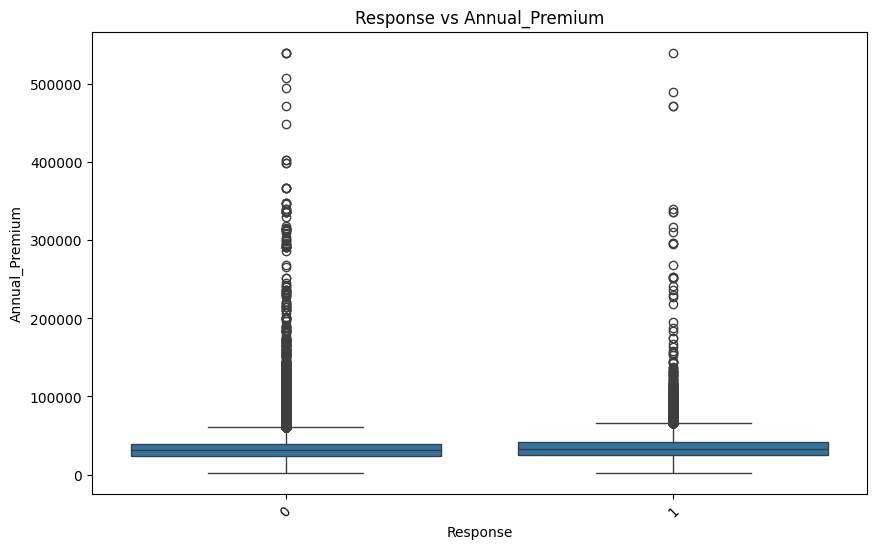

In [17]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer = BivariateAnalyzer(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Response', 'Annual_Premium')


Count


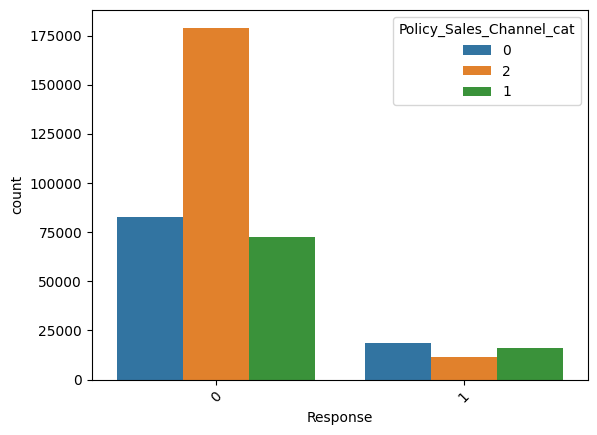


Contigency Table


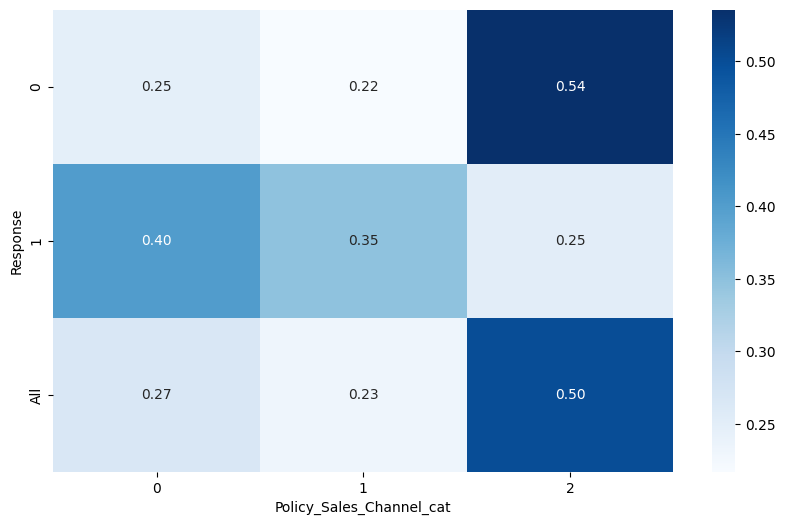

In [18]:

bivariate_analyzer.set_strategy(CategoricalVsCategoricalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Response', 'Policy_Sales_Channel_cat')


Count


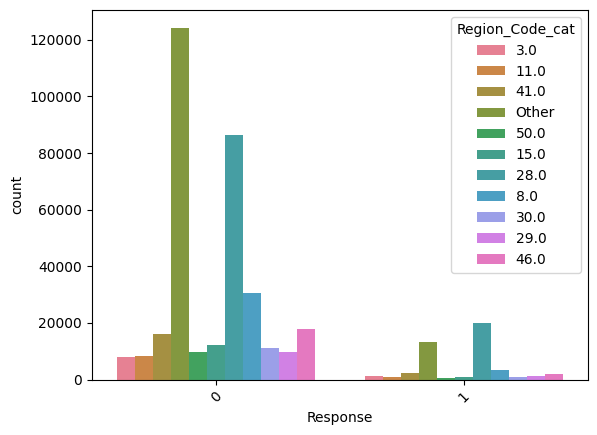


Contigency Table


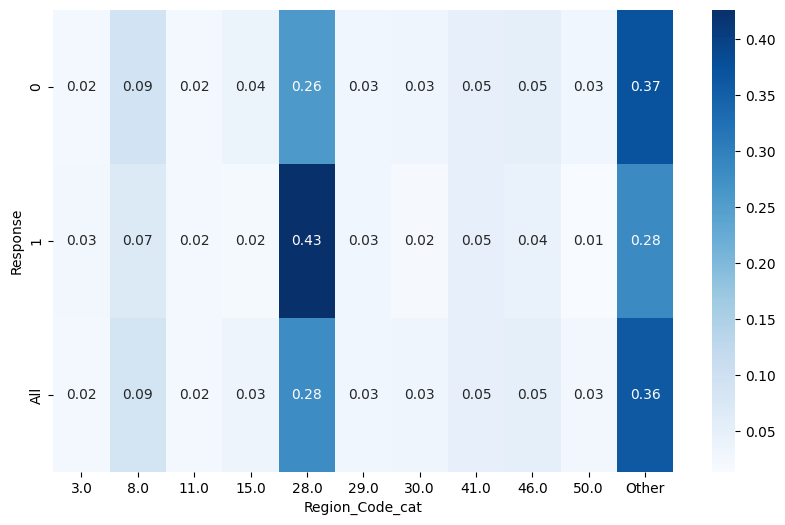

In [19]:
# bivariate_analyzer.set_strategy(CategoricalVsCategoricalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Response', 'Region_Code_cat')

In [44]:
df['Vehicle_Age'].value_counts()/df.shape[0]

Vehicle_Age
1-2 Year     0.525613
< 1 Year     0.432385
> 2 Years    0.042001
Name: count, dtype: float64


#### Univariate Analysis
- `Policy_Sales_Channel`
    -  The 153 unique values converge to 3 concentrated distributions. Only a few values with a frequency higher than 80,000, while the other values have frequencies below 30,000.
    - **Implication:** These distributions suggests that only few values may impact the `Response` target. This indicates that we should transform these values by clustering them into 3 groups, centered around ~20, 120 and 150.
- `Annual_Premium`
    - The distribution is positively skewed, with the value **$2360.0**  ocurring at ~17% outside the distribution.
    - **Implication:** We need to handle the outliers and consider a transformation for the value **$2360.0**
- `Response`
    - The target variable `Response` is imbalanced, with only ~12% belonging to the positive class.
    - **Implication:** This imbalance indicates that we should perform over-sampling using SMOTE.
- `Region_Code`
    - The distribution is varied, with 28 being the most common code. Most other codes have very few observations.
    - **Implication:** The high frequency of certain codes suggests that these regions could significantly influence overall `Response`. We can handle this feature by keeping the top 10 codes and grouping the others into an 'Other' category.

#### Bivariate Analysis
- `Annual_Premium vs Response`
    - Both `Response` classes have similar medians and interquartile ranges. Outliers exist, but they occur in both classes.
    - **Implication:** `Annual_Premium` does not appear to be a strong predictor.
    
- `Policy_Sales_Channel vs Response`
    - d
- `Region_Code vs Response`
    - d

<br>

# Multivariate Analysis

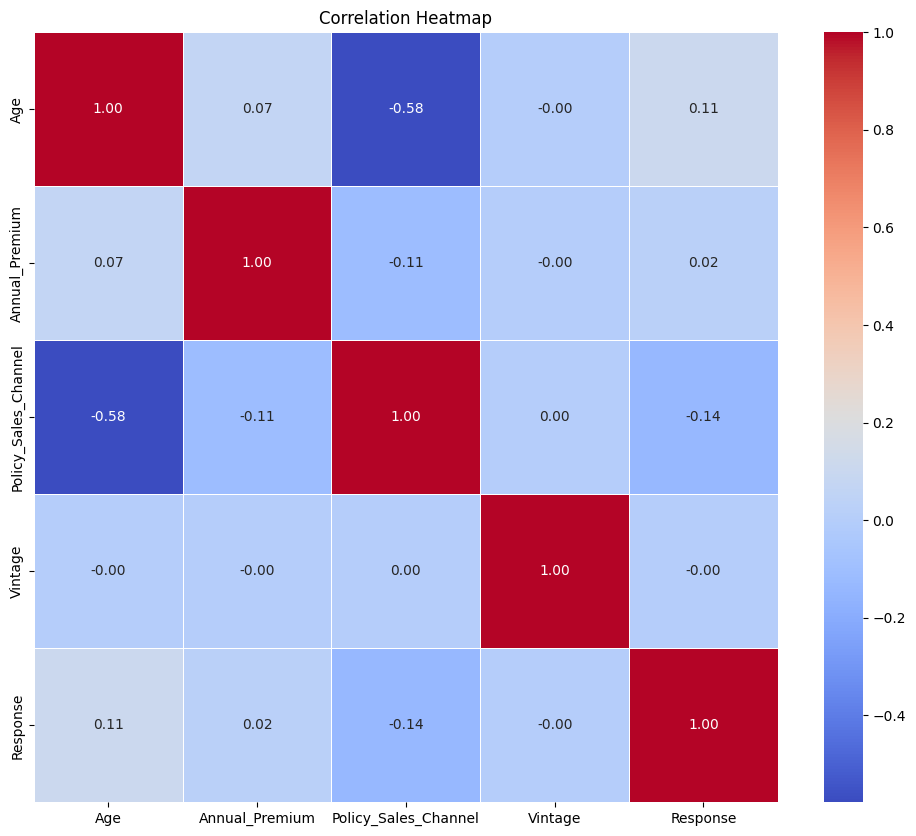

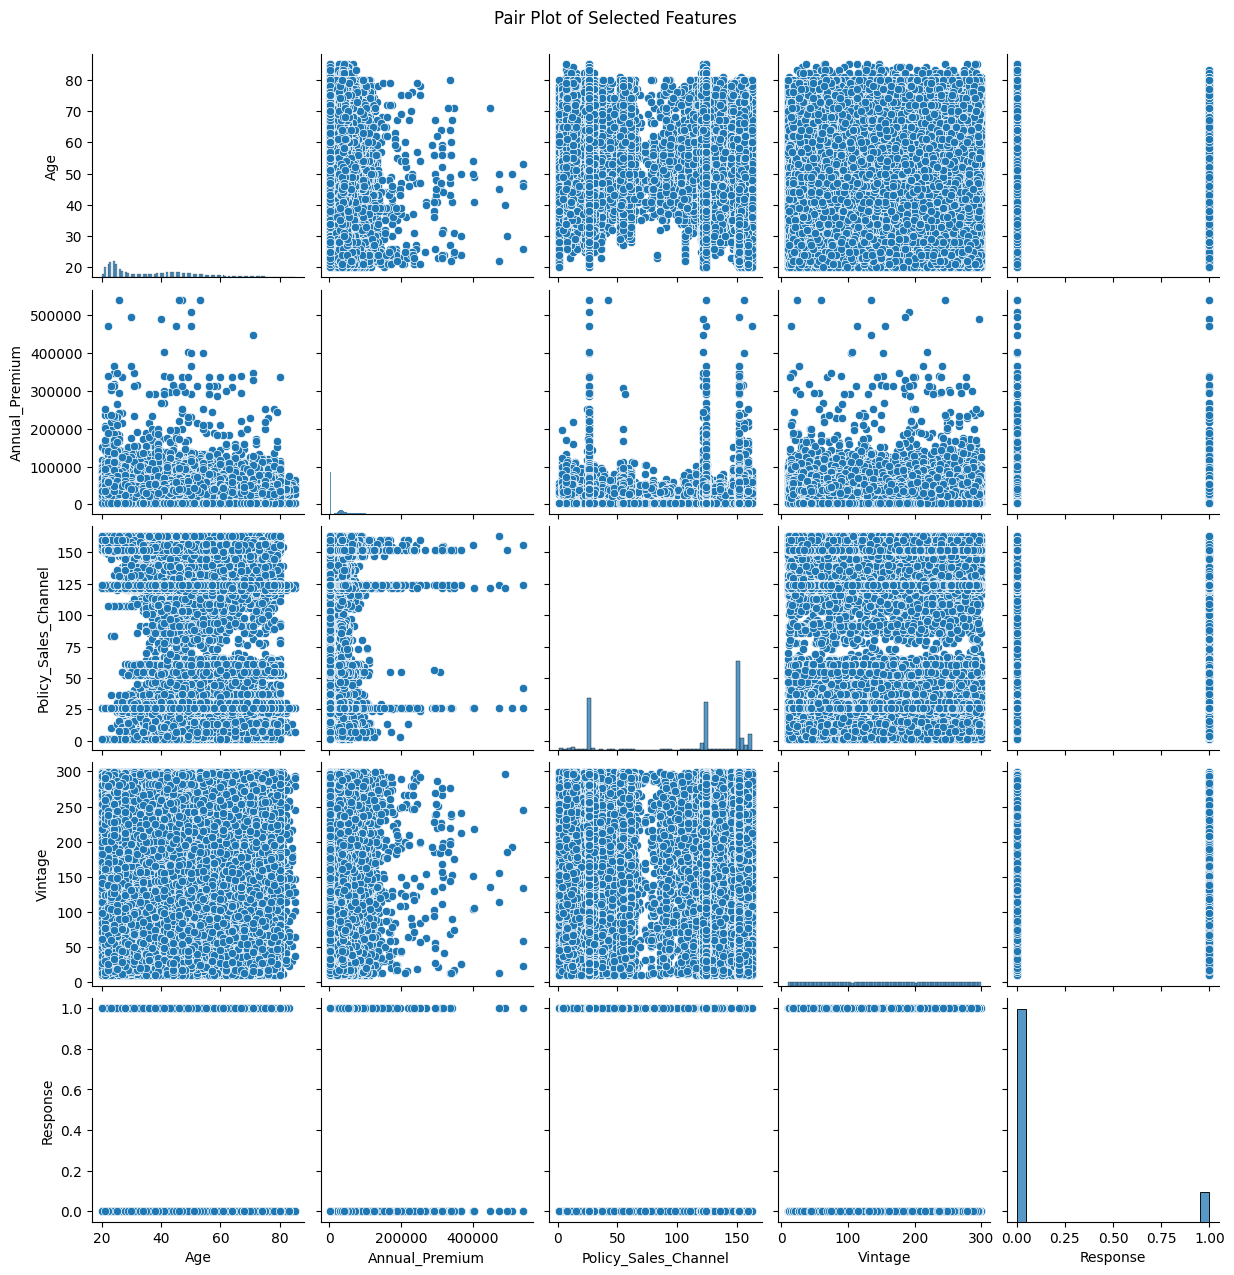

In [49]:
multivariate_analyzer = SimpleMultivariateAnalysis()
selected_features = df[['Age','Annual_Premium','Policy_Sales_Channel','Vintage','Response']]
multivariate_analyzer.analyze(selected_features)